In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyws41njg
  JVM stdout: /tmp/tmpyws41njg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpyws41njg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,5 months and 25 days
H2O_cluster_name:,H2O_from_python_unknownUser_v2v1t5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.250 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# 🔍 Exploratory Data Analysis (EDA)

In [2]:

train_sequences = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/train_sequences.csv')

train_labels = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/train_labels.csv')

validation_sequences = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/validation_sequences.csv')

validation_labels = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/validation_labels.csv')

In [3]:
train_sequences.shape

(844, 5)

### train_sequences.csv

In [4]:

print(f'train_sequences has {train_sequences.shape[0]} rows and {train_sequences.shape[1]} columns')

print(f'train_sequences has {train_sequences.isna().sum().sum()} NAs.')

train_sequences.head(12)

train_sequences has 844 rows and 5 columns
train_sequences has 5 NAs.


,target_id,sequence,temporal_cutoff,description,all_sequences
0,1SCL_A,GGGUGCUCAGUACGAGAGGAACCGCACCC,1995-01-26,"THE SARCIN-RICIN LOOP, A MODULAR RNA",>1SCL_1|Chain A|RNA SARCIN-RICIN LOOP|Rattus n...
1,1RNK_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGGCCCAU,1995-02-27,THE STRUCTURE OF AN RNA PSEUDOKNOT THAT CAUSES...,>1RNK_1|Chain A|RNA PSEUDOKNOT|null\nGGCGCAGUG...
2,1RHT_A,GGGACUGACGAUCACGCAGUCUAU,1995-06-03,24-MER RNA HAIRPIN COAT PROTEIN BINDING SITE F...,>1RHT_1|Chain A|RNA (5'-R(P*GP*GP*GP*AP*CP*UP*...
3,1HLX_A,GGGAUAACUUCGGUUGUCCC,1995-09-15,P1 HELIX NUCLEIC ACIDS (DNA/RNA) RIBONUCLEIC ACID,>1HLX_1|Chain A|RNA (5'-R(*GP*GP*GP*AP*UP*AP*A...
4,1HMH_E,GGCGACCCUGAUGAGGCCGAAAGGCCGAAACCGU,1995-12-07,THREE-DIMENSIONAL STRUCTURE OF A HAMMERHEAD RI...,">1HMH_1|Chains A, C, E|HAMMERHEAD RIBOZYME-RNA..."
5,1RNG_A,GGCGCUUGCGUC,1995-12-07,SOLUTION STRUCTURE OF THE CUUG HAIRPIN: A NOVE...,>1RNG_1|Chain A|RNA (5'-R(*GP*GP*CP*GP*CP*UP*U...
6,1MME_D,GGCCGAAACUCGUAAGAGUCACCAC,1996-02-06,THE CRYSTAL STRUCTURE OF AN ALL-RNA HAMMERHEAD...,">1MME_1|Chains A, C|RNA HAMMERHEAD RIBOZYME|\n..."
7,1KAJ_A,GGCGCAGUGGGCUAGCGCCACUCAAAAGCCCG,1996-07-11,CONFORMATION OF AN RNA PSEUDOKNOT FROM MOUSE M...,>1KAJ_1|Chain A|RNA PSEUDOKNOT APK|\nGGCGCAGUG...
8,1SLO_A,UUACCCAAGUUUGAGGUAA,1996-12-07,FIRST STEM LOOP OF THE SL1 RNA FROM CAENORHABD...,>1SLO_1|Chain A|RNA (5'-R(*UP*UP*AP*CP*CP*CP*A...
9,1BIV_A,GGCUCGUGUAGCUCAUUAGCUCCGAGCC,1996-12-23,"BOVINE IMMUNODEFICIENCY VIRUS TAT-TAR COMPLEX,...",>1BIV_1|Chain A|TAR RNA|synthetic construct (3...


# sequence column...specifically the length of the sequences.

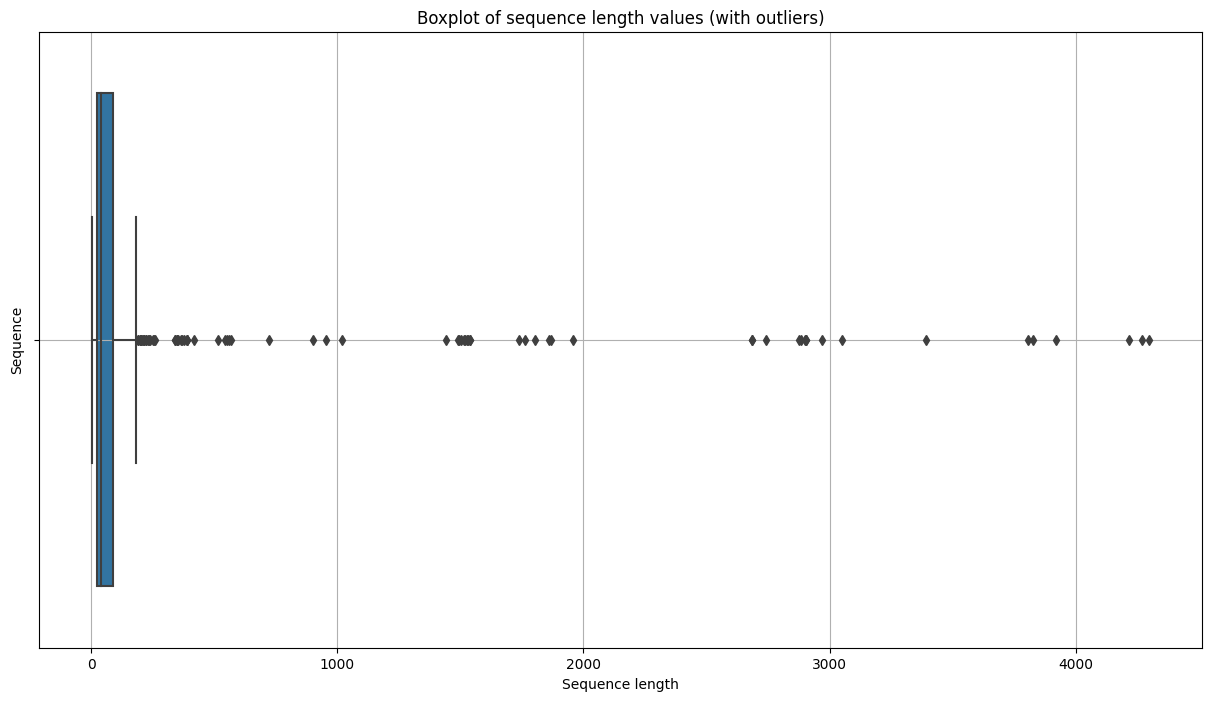

In [5]:

plt.figure(figsize=(15, 8))

train_sequences['length'] = train_sequences['sequence'].str.len()

sns.boxplot(x='length', data=train_sequences)
plt.xlabel("Sequence length")
plt.ylabel("Sequence")
plt.title("Boxplot of sequence length values (with outliers)")
plt.grid(True)
plt.show()

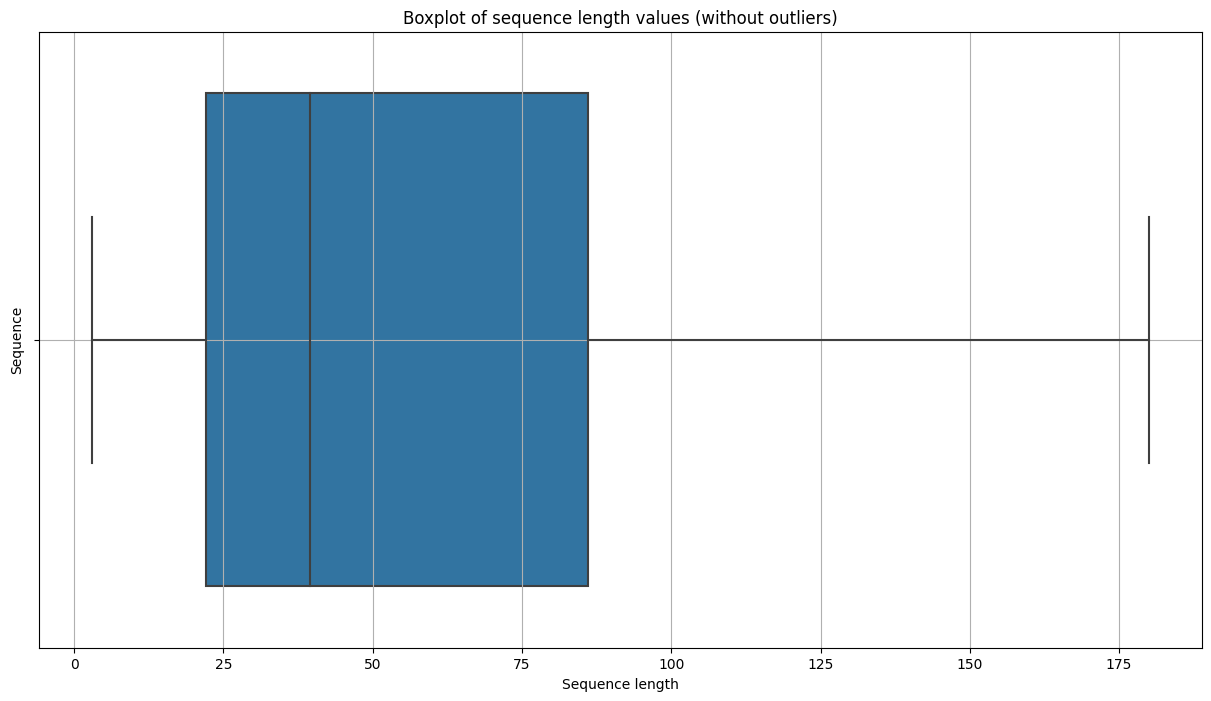

In [6]:
# Set the size of the canvas
plt.figure(figsize=(15, 8))

# Calculate sequence length and create a new DataFrame
train_sequences['length'] = train_sequences['sequence'].str.len()

# Draw a boxplot without showing outliers
sns.boxplot(x='length', data=train_sequences, showfliers=False)
plt.xlabel("Sequence length")
plt.ylabel("Sequence")
plt.title("Boxplot of sequence length values (without outliers)")
plt.grid(True)
plt.show()

### Look at the temporal_cutoff column to see how the length of published sequences has evolved over time

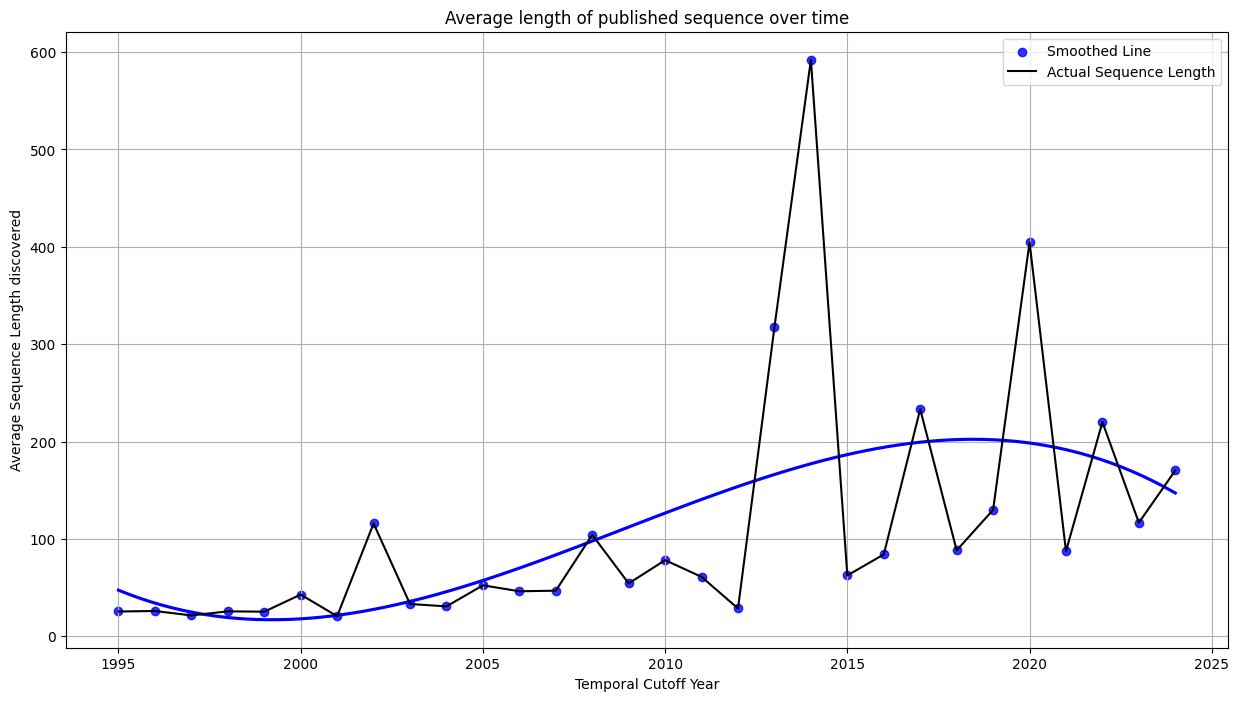

In [7]:
# Create new columns 'cutoff_year' and 'sequence_length'
train_sequences['cutoff_year'] = pd.to_datetime(train_sequences['temporal_cutoff']).dt.year
train_sequences['sequence_length'] = train_sequences['sequence'].str.len()

# Calculate the average sequence length per year
avg_sequence_length = (
    train_sequences
    .groupby('cutoff_year')
    .agg(avg_sequence_length=('sequence_length', 'mean'))
    .reset_index()
)

# Set the size of the canvas
plt.figure(figsize=(15, 8))

# Draw the actual sequence length and polynomial smoothing line
sns.regplot(x='cutoff_year', y='avg_sequence_length', data=avg_sequence_length, 
            order=3, ci=None, label='Smoothed Line', color='blue')
plt.plot(avg_sequence_length['cutoff_year'], avg_sequence_length['avg_sequence_length'], 
         color='black', label='Actual Sequence Length')

# Add labels and title
plt.xlabel("Temporal Cutoff Year")
plt.ylabel("Average Sequence Length discovered")
plt.title("Average length of published sequence over time")
plt.legend()
plt.grid(True)
plt.show()

### Focussing on the target_id...from the competition material:
>"In train_sequences.csv, this is formatted as pdb_id_chain_id, where pdb_id is the id of the entry in the Protein Data Bank and chain_id is the chain id of the monomer in the pdb file

#### Let's first look at how many unique pdb_id's and chain_id's there are in the train_sequences

In [8]:
# Import necessary libraries
import pandas as pd

# Assuming the train_sequences DataFrame contains the 'target_id' column
# Extract pdb_id and chain_id
train_sequences[['pdb_id', 'chain_id']] = train_sequences['target_id'].str.split('_', expand=True)

# Calculate the number of unique pdb_id
pdb_id_count = train_sequences['pdb_id'].nunique()

# Calculate the number of unique chain_id
chain_id_count = train_sequences['chain_id'].nunique()

# Print the results
print(f"There are {pdb_id_count} unique pdb_id's in the dataset.")
print(f"There are {chain_id_count} unique chain_id's in the dataset.")

There are 735 unique pdb_id's in the dataset.
There are 99 unique chain_id's in the dataset.


### Now let's look at which pdb_id's are repeated in the train_sequences

In [9]:
# Import necessary libraries
import pandas as pd

# Assuming the train_sequences DataFrame contains the 'target_id' column
# Extract pdb_id and chain_id
train_sequences[['pdb_id', 'chain_id']] = train_sequences['target_id'].str.split('_', expand=True)

# Calculate the total number of each pdb_id and filter out repeated pdb_id
repeated_pdb_ids = (
    train_sequences
    .groupby('pdb_id')
    .size()
    .reset_index(name='total')
    .query('total > 1')
    .sort_values(by='total', ascending=False)
)

# Get the top 10 repeated pdb_id
top_repeated_pdb_ids = repeated_pdb_ids.head(10)

# Print the results
print("In total, there are", repeated_pdb_ids.shape[0], "pdb_id's that are repeated in train_sequences.")
print("Top 10 most repeated pdb_id's:")
top_repeated_pdb_ids# In total, there are 60 pdb_id's that are repeated in train_sequences, with the top 10 most repeated shown below

In total, there are 60 pdb_id's that are repeated in train_sequences.
Top 10 most repeated pdb_id's:


,pdb_id,total
406,4V5Z,11
325,2OM7,7
331,2R1G,6
163,1ZC8,6
410,4V6W,5
411,4V6X,5
412,4V7E,5
549,6ZVK,5
351,3DEG,5
320,2NR0,4


In [10]:
train_sequences[train_sequences['pdb_id']=='4V5Z']

,target_id,sequence,temporal_cutoff,description,all_sequences,length,cutoff_year,sequence_length,pdb_id,chain_id
421,4V5Z_BP,GAGCCCGAGGGGCUC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,15,2014,15,4V5Z,BP
438,4V5Z_BA,GCCCCGGGUUCCUCCCGGGGC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,21,2014,21,4V5Z,BA
440,4V5Z_BH,CCCGGCUCGCUGGCGUGGAGCCGGG,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,25,2014,25,4V5Z,BH
443,4V5Z_BL,UGGGCGCCGCGAGGCGUCCA,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,20,2014,20,4V5Z,BL
447,4V5Z_BC,CGCCCCGCGGCGGGGCG,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,17,2014,17,4V5Z,BC
452,4V5Z_BK,GACGGGCGAUGGCCUCCGUUGCCCUC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,26,2014,26,4V5Z,BK
453,4V5Z_AH,GGAACCCGGGUGAAAGCCUGGGGUGCCCCGCCCGGGGAGCC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,41,2014,41,4V5Z,AH
456,4V5Z_BU,GGUCGUCCCUCCGACC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,16,2014,16,4V5Z,BU
459,4V5Z_BQ,GCGUCCGCCCGCCCCGGCGCGGGCGGGCGC,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,30,2014,30,4V5Z,BQ
460,4V5Z_AF,UUACGCGCCAGCGGUUCGGCCGGGCCCCCAA,2014-07-09,Structure of a mammalian 80S ribosome obtained...,>4V5Z_1|Chain A[auth AA]|18S Ribosomal RNA|Can...,31,2014,31,4V5Z,AF


### train_labels.csv

In [11]:
# Assuming train_labels is a Pandas DataFrame
# Print the number of rows and columns
print(f'train_labels has {train_labels.shape[0]} rows and {train_labels.shape[1]} columns.')
# Print the total number of missing values
print(f'train_labels has {train_labels.isna().sum().sum()} NAs.')
# Quick view of the data
train_labels.head(3)

train_labels has 137095 rows and 6 columns.
train_labels has 18435 NAs.


,ID,resname,resid,x_1,y_1,z_1
0,1SCL_A_1,G,1,13.760,-25.974001,0.102
1,1SCL_A_2,G,2,9.310,-29.638000,2.669
2,1SCL_A_3,G,3,5.529,-27.813000,5.878


In [12]:
train_labels.shape

(137095, 6)

In [13]:
# Find rows with missing values and display the first 3 rows
na_rows = train_labels[train_labels.isna().any(axis=1)]
# Print the first 3 rows
na_rows.head(3)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ID,resname,resid,x_1,y_1,z_1
410,1ZDI_S_1,A,1,NaN,NaN,NaN
411,1ZDI_S_2,C,2,NaN,NaN,NaN
412,1ZDI_S_3,A,3,NaN,NaN,NaN


In [14]:
na_rows.shape

(6145, 6)

### Let's create a boxplot of the coordinate values for x, y, & z 

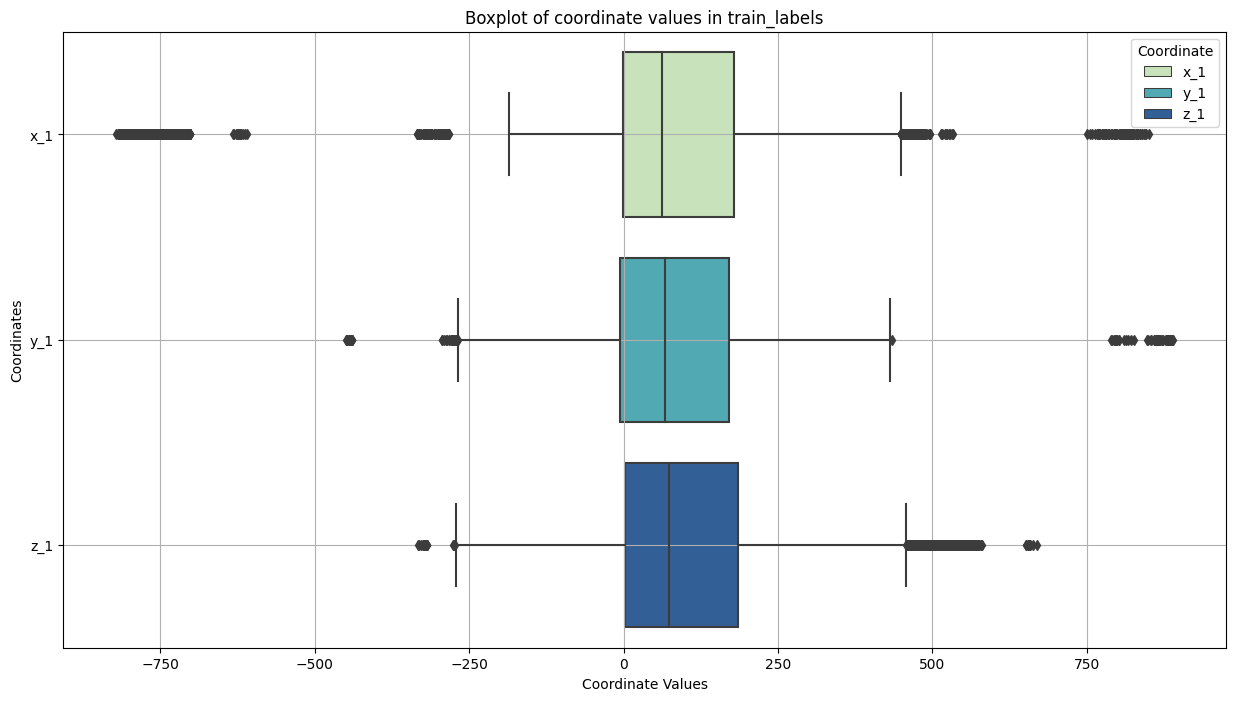

In [15]:
# Select x_1, y_1, z_1 columns and convert to long format
train_labels_long = train_labels[['x_1', 'y_1', 'z_1']].melt(var_name='coordinate', value_name='value')
# Set the size of the canvas
plt.figure(figsize=(15, 8))
# Draw a boxplot
sns.boxplot(x='value', y='coordinate', data=train_labels_long, hue='coordinate', palette='YlGnBu', dodge=False)
# Add labels and title
plt.xlabel("Coordinate Values")
plt.ylabel("Coordinates")
plt.title("Boxplot of coordinate values in train_labels")
plt.legend(title='Coordinate', loc='upper right')
plt.grid(True)
plt.show()

### Resname occurrences in train_labels

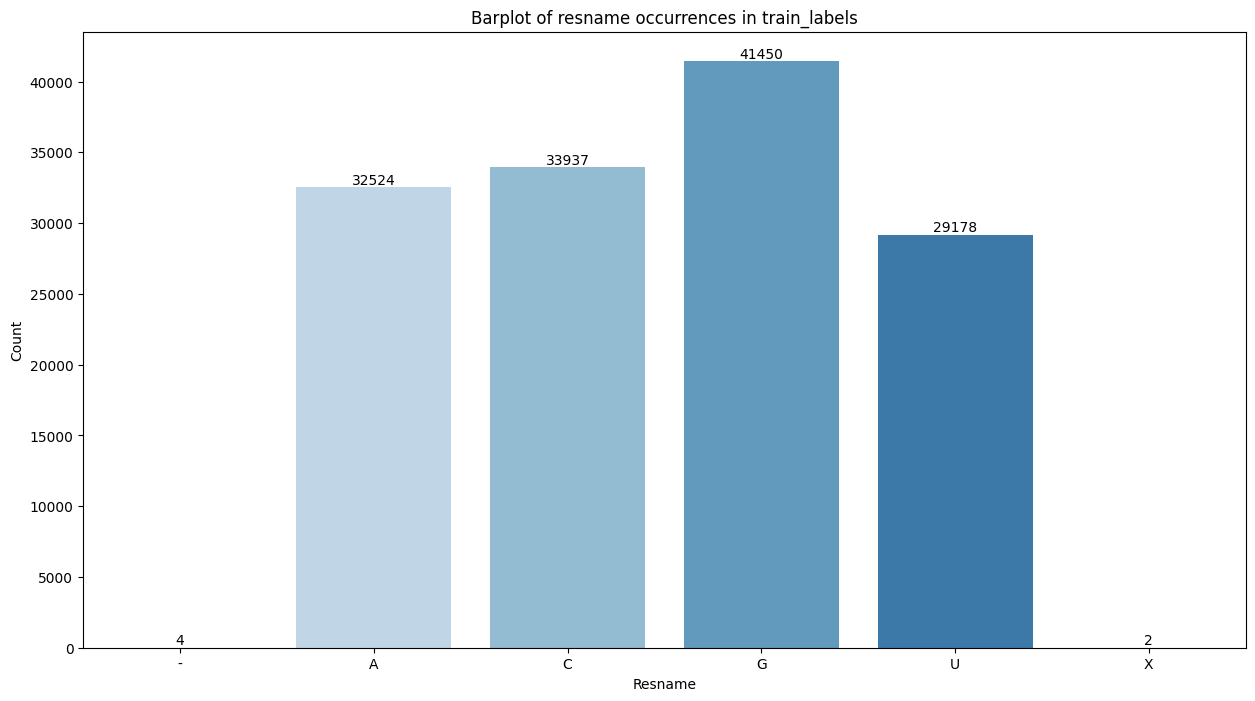

In [16]:
# Calculate the occurrence of each resname
resname_counts = train_labels.groupby('resname').size().reset_index(name='total')
# Set the size of the canvas
plt.figure(figsize=(15, 8))
# Draw a bar plot
sns.barplot(x='resname', y='total', data=resname_counts, palette='Blues')
# Add count labels on the bars
for index, row in resname_counts.iterrows():
    plt.text(index, row['total'], row['total'], ha='center', va='bottom')
# Set labels and title
plt.xlabel("Resname")
plt.ylabel("Count")
plt.title("Barplot of resname occurrences in train_labels")
# Hide the legend
plt.legend().set_visible(False)
# Use a minimalist theme
sns.set_theme(style="whitegrid")
# Show the plot
plt.show()

### validation_sequences.csv

In [17]:
# Import necessary libraries
import pandas as pd

# Assuming validation_sequences is a Pandas DataFrame
# Print the number of rows and columns
print(f'validation_sequences has {validation_sequences.shape[0]} rows and {validation_sequences.shape[1]} columns.')

# Print the total number of missing values
print(f'validation_sequences has {validation_sequences.isna().sum().sum()} NAs.')

# Quick view of the data
validation_sequences.head(3)

validation_sequences has 12 rows and 5 columns.
validation_sequences has 0 NAs.


,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."


### Let's recreate the boxplot of the sequence lengths we used in train_sequences, using outliers = FALSE

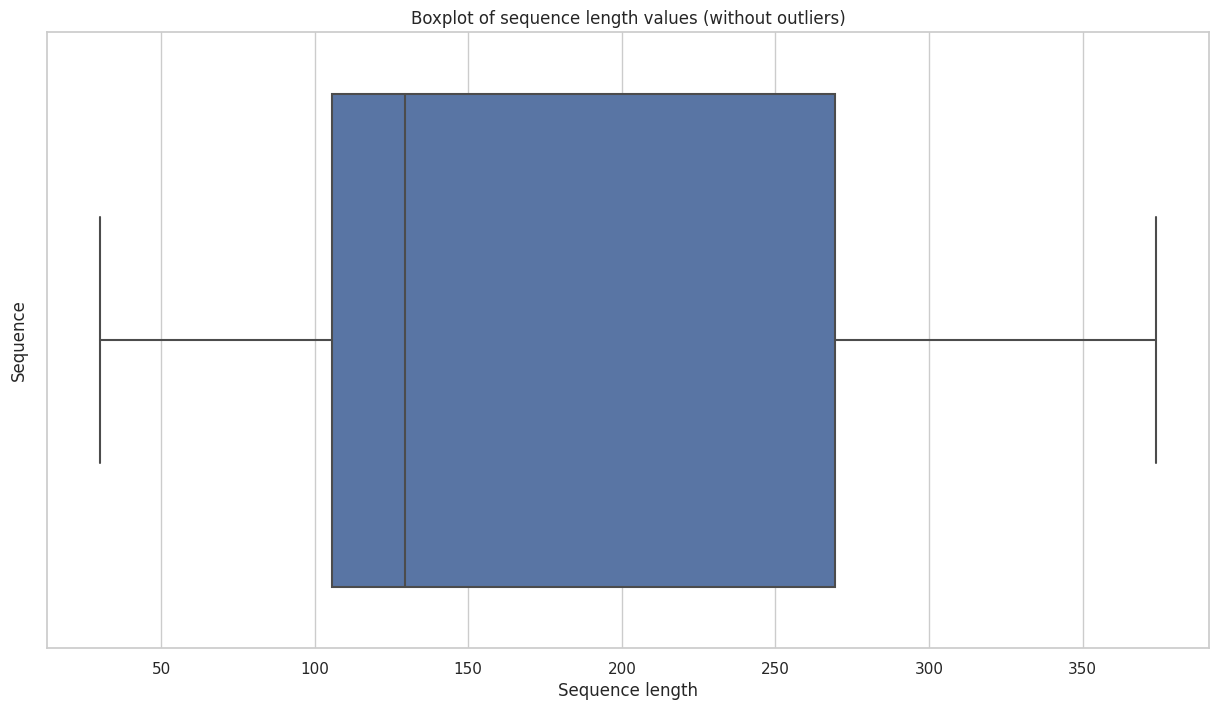

In [18]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming validation_sequences is a Pandas DataFrame
# Calculate sequence length and create a new column
validation_sequences['length'] = validation_sequences['sequence'].str.len()

# Set the size of the canvas
plt.figure(figsize=(15, 8))

# Draw a boxplot
sns.boxplot(x='length', data=validation_sequences, showfliers=False)

# Set labels and title
plt.xlabel("Sequence length")
plt.ylabel("Sequence")
plt.title("Boxplot of sequence length values (without outliers)")

# Use a minimalist theme
sns.set_theme(style="whitegrid")

# Show the plot
plt.show()

In [19]:
# Import necessary libraries
import pandas as pd

# Assuming train_sequences and validation_sequences are Pandas DataFrames
# Calculate the median sequence length for train_sequences
train_sequence_med = train_sequences['sequence'].str.len().median()

# Calculate the median sequence length for validation_sequences
valid_sequence_med = validation_sequences['sequence'].str.len().median()

# Print the results
print(f'The train_sequences median sequence length is {train_sequence_med}.')
print(f'The validation_sequences median sequence length is {valid_sequence_med}.')

The train_sequences median sequence length is 39.5.
The validation_sequences median sequence length is 129.5.


### validation_labels.csv

In [20]:
# Import necessary libraries
import pandas as pd

# Assuming validation_labels is a Pandas DataFrame
# Print the number of rows and columns
print(f'validation_labels has {validation_labels.shape[0]} rows and {validation_labels.shape[1]} columns.')

# Print the total number of missing values
print(f'validation_labels has {validation_labels.isna().sum().sum()} NAs.')

print("Note validation_labels has 123 columns; train_labels has 6.")
# Quick view of the data
validation_labels.head(3)

validation_labels has 2515 rows and 123 columns.
validation_labels has 0 NAs.
Note validation_labels has 123 columns; train_labels has 6.


,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,...,z_37,x_38,y_38,z_38,x_39,y_39,z_39,x_40,y_40,z_40
0,R1107_1,G,1,-5.499,8.520,8.605000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
1,R1107_2,G,2,-5.826,10.453,14.010000,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18
2,R1107_3,G,3,-5.849,14.768,17.584999,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,...,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18,-1.000000e+18


### The number of NAs is misleading; from a discussion post [here](https://www.kaggle.com/competitions/stanford-rna-3d-folding/discussion/565746), the -1e+18 should be interpreted as NA/NaN values.

### We will recreate the resname boxplot from train_labels from earlier:

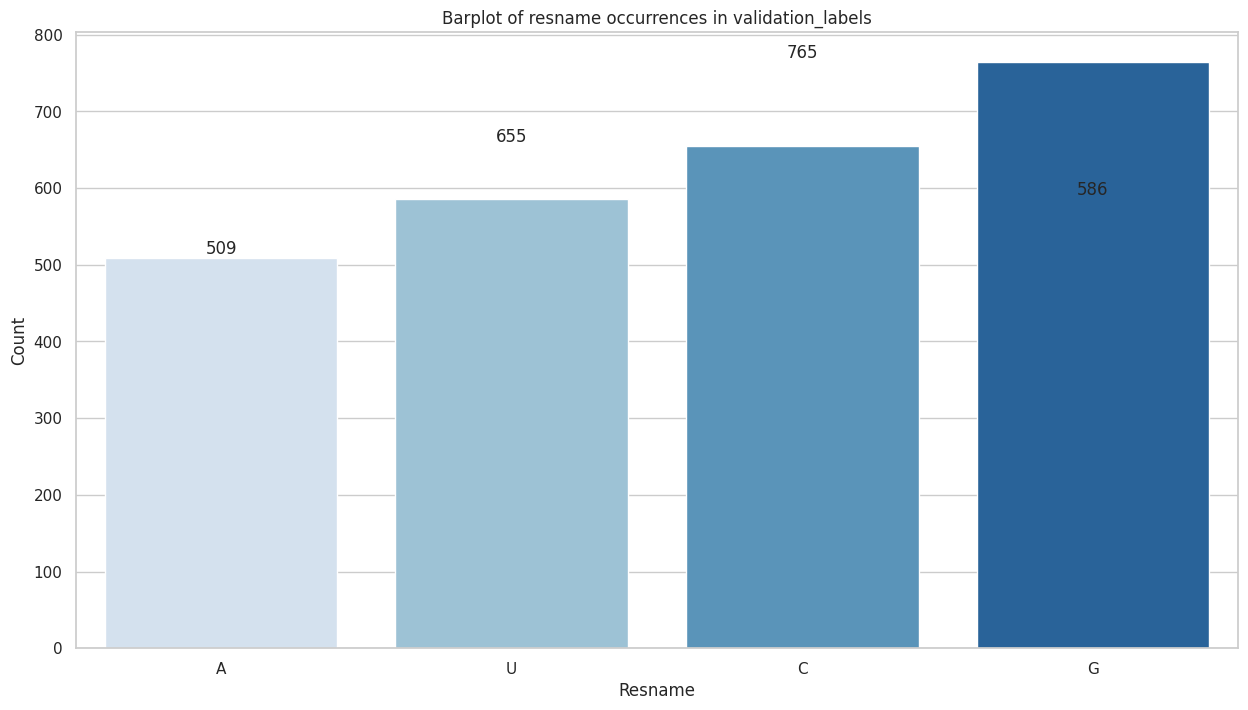

Note there are no missing or 'X' resnames.
Also of note is in this dataset, 'U' occurs more frequently than 'A'. 'C' and 'G' maintain their ordering.


In [21]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming validation_labels is a Pandas DataFrame
# Calculate the occurrence of each resname
resname_counts = validation_labels.groupby('resname').size().reset_index(name='total')

# Set the size of the canvas
plt.figure(figsize=(15, 8))

# Draw a bar plot
sns.barplot(x='resname', y='total', data=resname_counts, palette='Blues', order=resname_counts.sort_values('total')['resname'])

# Add count labels on the bars
for index, row in resname_counts.iterrows():
    plt.text(index, row['total'], row['total'], ha='center', va='bottom')

# Set labels and title
plt.xlabel("Resname")
plt.ylabel("Count")
plt.title("Barplot of resname occurrences in validation_labels")

# Hide the legend
plt.legend().set_visible(False)

# Use a minimalist theme
sns.set_theme(style="whitegrid")

# Show the plot
plt.show()

# Explanation
print("Note there are no missing or 'X' resnames.")
print("Also of note is in this dataset, 'U' occurs more frequently than 'A'. 'C' and 'G' maintain their ordering.")

### Submission format

In [22]:
# Import necessary libraries
import pandas as pd

# Read the sample submission file
sample_submission = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/sample_submission.csv')

# Print the number of rows and columns
print(f'There are {sample_submission.shape[0]} rows and {sample_submission.shape[1]} columns.')

# Quick view of the first 6 rows of data
print("Note: It is required to submit 5 sets of coordinate plots (x,y,z), per ID, resname & resid from the target_id, which is 18 columns.")
print("For rows in the submission, we need one row for each resname/resid for each target.")
print("From the sample submission, we need 2515 rows.")
sample_submission.head(6)

There are 2515 rows and 18 columns.
Note: It is required to submit 5 sets of coordinate plots (x,y,z), per ID, resname & resid from the target_id, which is 18 columns.
For rows in the submission, we need one row for each resname/resid for each target.
From the sample submission, we need 2515 rows.


,ID,resname,resid,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
0,R1107_1,G,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,R1107_2,G,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,R1107_3,G,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,R1107_4,G,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R1107_5,G,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,R1107_6,C,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training


### Generate output file from test_sequence

In [23]:
# Import necessary libraries
import pandas as pd

# Read the test sequences file
test_sequences = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/test_sequences.csv')

# Print the number of rows and columns
print(f'There are {test_sequences.shape[0]} rows and {test_sequences.shape[1]} columns.')

# Explanation
print("Reading in the test sequences, we can see we have 12 rows and the same 5 columns found in train & validation sequences.")
test_sequences.head()

There are 12 rows and 5 columns.
Reading in the test sequences, we can see we have 12 rows and the same 5 columns found in train & validation sequences.


,target_id,sequence,temporal_cutoff,description,all_sequences
0,R1107,GGGGGCCACAGCAGAAGCGUUCACGUCGCAGCCCCUGUCAGCCAUU...,2022-05-28,CPEB3 ribozyme\nHuman\nhuman CPEB3 HDV-like ri...,>7QR4_1|Chain A|U1 small nuclear ribonucleopro...
1,R1108,GGGGGCCACAGCAGAAGCGUUCACGUCGCGGCCCCUGUCAGCCAUU...,2022-05-27,CPEB3 ribozyme\nChimpanzee\nChimpanzee CPEB3 H...,">7QR3_1|Chains A, B|U1 small nuclear ribonucle..."
2,R1116,CGCCCGGAUAGCUCAGUCGGUAGAGCAGCGGCUAAAACAGCUCUGG...,2022-06-04,Cloverleaf RNA\nPoliovirus\nCrystal Structure ...,">8S95_1|Chain A[auth C]|Lysine tRNA scaffold,P..."
3,R1117v2,UUGGGUUCCCUCACCCCAAUCAUAAAAAGG,2022-06-03,PreQ1 class I type III riboswitch\nK. pneumoni...,">8FZA_1|Chains A, B|PreQ1 Riboswitch (30-MER)|..."
4,R1126,GGAAUCUCGCCCGAUGUUCGCAUCGGGAUUUGCAGGUCCAUGGAUU...,2022-06-11,Traptamer\nSynthetic\nAdditional Information: ...,>8TVZ_1|Chain A[auth C]|RNA (363-MER)|syntheti...


In [24]:
# Import necessary libraries
import pandas as pd

# Read the test sequences file
test_sequences = pd.read_csv('/kaggle/input/stanford-rna-3d-folding/test_sequences.csv')

# Calculate the total length of all sequences
total_length = test_sequences['sequence'].str.len().sum()

print(f'Total length of sequences in test_sequences is {total_length}.')

# Create a DataFrame to store submission data
submission_df = pd.DataFrame(columns=['target_id', 'resname', 'resid', 'x', 'y', 'z'])  # Define columns as needed

# Explanation
print("Now, we need to create the df to house our submission.")

Total length of sequences in test_sequences is 2515.
Now, we need to create the df to house our submission.


In [25]:
# This function will accept a test_sequence ID & sequence and return df in format of submission (one resid/resname per row in sequence)
def parse_target(tmp_ID, tmp_sequence):
    seq_length = len(tmp_sequence)
    tmp_df = pd.DataFrame(columns=['ID', 'resname', 'resid'], index=range(seq_length))
    tmp_df['resname'] = list(tmp_sequence)
    tmp_df['ID'] = tmp_ID
    tmp_df['resid'] = range(1, seq_length + 1)
    return tmp_df

# Create the test_clean df in the format of the submission
test_id_seq = test_sequences[['target_id', 'sequence']]
test_clean = pd.DataFrame(columns=['ID', 'resname', 'resid'])

# For each target_id / sequence, apply the function and append to previous results
for index, row in test_id_seq.iterrows():
    tmp_df = parse_target(row['target_id'], row['sequence'])
    test_clean = pd.concat([test_clean, tmp_df], ignore_index=True)

print(f'There are {test_clean.shape[0]} rows in the test_clean df.')
print(test_clean.head())

# That works...now let's get back to the training data, add some features, & train a model.

There are 2515 rows in the test_clean df.
      ID resname resid
0  R1107       G     1
1  R1107       G     2
2  R1107       G     3
3  R1107       G     4
4  R1107       G     5


# 🎯 Model Training

In [26]:
def feat_eng(df):
    df = df.copy() # To avoid modifying the original df
    df['seq_length'] = df['sequence'].str.len()
    df['A_cnt'] = df['sequence'].str.count('A')
    df['C_cnt'] = df['sequence'].str.count('C')
    df['U_cnt'] = df['sequence'].str.count('U')
    df['G_cnt'] = df['sequence'].str.count('G')
    df['AC_cnt'] = df['sequence'].str.count('AC')
    df['AU_cnt'] = df['sequence'].str.count('AU')
    df['AG_cnt'] = df['sequence'].str.count('AG')
    df['CA_cnt'] = df['sequence'].str.count('CA')
    df['CU_cnt'] = df['sequence'].str.count('CU')
    df['CG_cnt'] = df['sequence'].str.count('CG')
    df['UA_cnt'] = df['sequence'].str.count('UA')
    df['UC_cnt'] = df['sequence'].str.count('UC')
    df['UG_cnt'] = df['sequence'].str.count('UG')
    df['GA_cnt'] = df['sequence'].str.count('GA')
    df['GC_cnt'] = df['sequence'].str.count('GC')
    df['GU_cnt'] = df['sequence'].str.count('GU')
    df['AA_cnt'] = df['sequence'].str.count('AA')
    df['CC_cnt'] = df['sequence'].str.count('CC')
    df['UU_cnt'] = df['sequence'].str.count('UU')
    df['GG_cnt'] = df['sequence'].str.count('GG')
    df['begin_seq'] = df['sequence'].str[0]
    df['end_seq'] = df['sequence'].str[-1]
    df = df.drop(columns=['sequence', 'temporal_cutoff', 'description', 'all_sequences'])
    return df

train_sequences_fe = feat_eng(train_sequences.copy()) # Apply feature engineering

# Create the target_id from ID to facilitate joining with the meta_train data we just created
train_labels_target_id = train_labels.copy()

def split_id(id_str):
    parts = id_str.split('_')
    if len(parts) == 2:
        return pd.Series(parts)
    else:
        return pd.Series([parts[0], 'A']) # Default chain ID 'A' if split is not 2 parts

split_df = train_labels_target_id['ID'].apply(split_id)
train_labels_target_id['pdb_id'] = split_df[0]
train_labels_target_id['chain_id_temp'] = split_df[1]


train_labels_target_id['target_id'] = train_labels_target_id['pdb_id'] + '_' + train_labels_target_id['chain_id_temp'].astype(str) # reconstruct target_id
train_labels_target_id = train_labels_target_id.drop(columns=['pdb_id','chain_id_temp'])

# Create the final df to train
train_data_clean = pd.merge(train_labels_target_id, train_sequences_fe, on="target_id", how="left")

# For now, we will impute the missing x_1,y_1,z_1 values with the group average for that target_id, resname
train_data_clean[['x_1', 'y_1', 'z_1']] = train_data_clean.groupby(['target_id', 'resname'])[['x_1', 'y_1', 'z_1']].transform(lambda x: x.fillna(x.mean()))

# The above imputation for train_data_clean doesn't take care of all NAs...so for now we will remove them(~ 1979 rows)
train_data_clean = train_data_clean.dropna()
print(f"There are {train_data_clean.isna().sum().sum()} NA's in the dataset!")

There are 0 NA's in the dataset!


In [27]:
features = train_data_clean.drop(columns=['x_1','y_1','z_1', 'ID', 'target_id']).columns.tolist()

In [28]:
features = train_data_clean.drop(columns=['x_1','y_1','z_1', 'ID', 'target_id']).columns.tolist()

### For now, our model approach will consist of 3 separate models for x,y,z values

In [29]:
train_hframe_x = h2o.H2OFrame(train_data_clean.drop(columns=['ID','y_1','z_1'])) # will need to separate out x_1,y_1,z_1 & ID for each iteration
train_hframe_x['resname'] = train_hframe_x['resname'].asfactor()
train_hframe_x['begin_seq'] = train_hframe_x['begin_seq'].asfactor()
train_hframe_x['end_seq'] = train_hframe_x['end_seq'].asfactor()

# split the data into training and validation sets:
splits_x = train_hframe_x.split_frame(ratios=[0.8], seed=1)
train_x = splits_x[0]
valid_x = splits_x[1]

xgb_x = h2o.estimators.H2OXGBoostEstimator(
    nfolds = 5,
    seed = 1,
    booster = 'gbtree',
    ntrees=200,
    max_depth=15,
    keep_cross_validation_predictions = True
)

xgb_x.train(x = features,
            y = 'x_1',
            training_frame = train_x, # Corrected to use train_x and valid_x
            validation_frame = valid_x)

print(xgb_x.mse(train=True, valid=True))

# Train model for Y
train_hframe_y = h2o.H2OFrame(train_data_clean.drop(columns=['ID','x_1','z_1'])) # will need to separate out x_1,y_1,z_1 & ID for each iteration
train_hframe_y['resname'] = train_hframe_y['resname'].asfactor()
train_hframe_y['begin_seq'] = train_hframe_y['begin_seq'].asfactor()
train_hframe_y['end_seq'] = train_hframe_y['end_seq'].asfactor()

# split the data into training and validation sets:
splits_y = train_hframe_y.split_frame(ratios=[0.8], seed=1)
train_y = splits_y[0]
valid_y = splits_y[1]

xgb_y = h2o.estimators.H2OXGBoostEstimator(
    nfolds = 10,
    seed = 1,
    booster = 'gbtree',
    ntrees=200,
    max_depth=15,
    keep_cross_validation_predictions = True
)

xgb_y.train(x = features,
            y = 'y_1',
            training_frame = train_y, # Corrected to use train_y and valid_y
            validation_frame = valid_y)

print(xgb_y.mse(train=True, valid=True))

# Train model for Z
train_hframe_z = h2o.H2OFrame(train_data_clean.drop(columns=['ID','y_1','x_1'])) # will need to separate out x_1,y_1,z_1 & ID for each iteration
train_hframe_z['resname'] = train_hframe_z['resname'].asfactor()
train_hframe_z['begin_seq'] = train_hframe_z['begin_seq'].asfactor()
train_hframe_z['end_seq'] = train_hframe_z['end_seq'].asfactor()
# split the data into training and validation sets:
splits_z = train_hframe_z.split_frame(ratios=[0.8], seed=1)
train_z = splits_z[0]
valid_z = splits_z[1]

xgb_z = h2o.estimators.H2OXGBoostEstimator(
    nfolds = 5,
    seed = 1,
    booster = 'gbtree',
    ntrees=200,
    max_depth=15,
    keep_cross_validation_predictions = True
)

xgb_z.train(x = features,
            y = 'z_1',
            training_frame = train_z, # Corrected to use train_z and valid_z
            validation_frame = valid_z)

print(xgb_z.mse(train=True, valid=True))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [chain_id]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
{'train': 87.32498381074666, 'valid': 254.15439888113858}
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [chain_id]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
{'train': 85.81456354170068, 'valid': 218.77490256595073}
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [chain_id]
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████| (done) 100%
{'train': 109.39861865539727, 'valid': 207.86824827062622}


In [30]:
# Create features on test sequence
test_sequences_fe = feat_eng(test_sequences.copy())

# Merge test_clean we created earlier with test_sequences
test_data_clean = pd.merge(test_clean, test_sequences_fe, left_on="ID", right_on="target_id", how="left")
test_data_clean['resname'] = test_data_clean['resname'].astype('category') # Convert to category for h2o
test_data_clean['begin_seq'] = test_data_clean['begin_seq'].astype('category')
test_data_clean['end_seq'] = test_data_clean['end_seq'].astype('category')

In [31]:
preds_x = xgb_x.predict(h2o.H2OFrame(test_data_clean.drop(columns=['ID', 'target_id'])))
preds_y = xgb_y.predict(h2o.H2OFrame(test_data_clean.drop(columns=['ID', 'target_id'])))
preds_z = xgb_z.predict(h2o.H2OFrame(test_data_clean.drop(columns=['ID', 'target_id'])))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'pdb_id': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'length': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'cutoff_year': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'sequence_length': substituting in a column of NaN
  warnings.warn(w)


████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |

/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'pdb_id': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'length': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'cutoff_year': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'sequence_length': substituting in a column of NaN
  warnings.warn(w)


████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'pdb_id': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'length': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'cutoff_year': substituting in a column of NaN
  warnings.warn(w)
/usr/local/lib/python3.10/dist-packages/h2o/job.py:81: UserWarning: Test/Validation dataset is missing column 'sequence_length': substituting in a column of NaN
  warnings.warn(w)


# 🤞 Submission

### For now, we will use the same predictions for all x,y,z combinations.  Future version will incorporate different methods for these predictions.

In [32]:
submission = pd.DataFrame({
    'ID': test_data_clean['ID'],
    'resname': test_data_clean['resname'],
    'resid': test_data_clean['resid']
})

submission = pd.concat([
    submission,
    preds_x.as_data_frame(),
    preds_y.as_data_frame(),
    preds_z.as_data_frame(),

    preds_x.as_data_frame(),
    preds_y.as_data_frame(),
    preds_z.as_data_frame(),

    preds_x.as_data_frame(),
    preds_y.as_data_frame(),
    preds_z.as_data_frame(),

    preds_x.as_data_frame(),
    preds_y.as_data_frame(),
    preds_z.as_data_frame(),

    preds_x.as_data_frame(),
    preds_y.as_data_frame(),
    preds_z.as_data_frame()
], axis=1)

submission.columns = sample_submission.columns.tolist()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow a

### My first two submissions in R errored at the scoring phase.  This was due to the ID columns not being in the same order as the sample_submission, so we will create a simple sort column based off the sample_submission, and apply that to our submission df.

In [33]:
# Update ID to match submission ID column
submission['ID'] = submission['ID'] + '_' + submission['resid'].astype(str)

# Create a sort_order column within the sample_submission so we can apply it to our submission
sample_submission['sort_order'] = range(len(sample_submission))
submission = pd.merge(submission, sample_submission[['ID', 'sort_order']], on='ID', how='left').sort_values('sort_order').drop(columns=['sort_order'])

In [34]:
print(submission.head(3))

        ID resname resid        x_1       y_1         z_1        x_2  \
0  R1107_1       G     1 -11.068602 -0.811335  109.864998 -11.068602   
1  R1107_2       G     2 -10.938802 -1.896393  108.835800 -10.938802   
2  R1107_3       G     3 -11.626884 -3.290529  107.734756 -11.626884   

        y_2         z_2        x_3       y_3         z_3        x_4       y_4  \
0 -0.811335  109.864998 -11.068602 -0.811335  109.864998 -11.068602 -0.811335   
1 -1.896393  108.835800 -10.938802 -1.896393  108.835800 -10.938802 -1.896393   
2 -3.290529  107.734756 -11.626884 -3.290529  107.734756 -11.626884 -3.290529   

          z_4        x_5       y_5         z_5  
0  109.864998 -11.068602 -0.811335  109.864998  
1  108.835800 -10.938802 -1.896393  108.835800  
2  107.734756 -11.626884 -3.290529  107.734756  


In [35]:
submission.to_csv('submission.csv', index=False)
h2o.shutdown()

H2O session _sid_b738 closed.


<ipython-input-35-6f0af6ca6fa5>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()
